In [1]:
from functions import tensor_to_img
from datasets import load_dataset
from DiffusionDBDataLoader import DiffusionDBDataLoader
import torchvision.transforms as transforms
import json
import matplotlib.pyplot as plt
import torch

In [2]:
dataset = load_dataset('poloclub/diffusiondb', '2m_first_1k')["train"]
images_dataset = dataset["image"]
prompts_dataset = dataset["prompt"]
max_img_width = max(dataset["width"])
max_img_height = max(dataset["height"])

Found cached dataset diffusiondb (C:/Users/norbe/.cache/huggingface/datasets/poloclub___diffusiondb/2m_first_1k/0.9.1/547894e3a57aa647ead68c9faf148324098f47f2bc1ab6705d670721de9d89d1)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
demo_index = 5

a renaissance portrait of dwayne johnson, art in the style of rembrandt!! intricate. ultra detailed, oil on canvas, wet - on - wet technique, pay attention to facial details, highly realistic, cinematic lightning, intricate textures, illusionistic detail, 


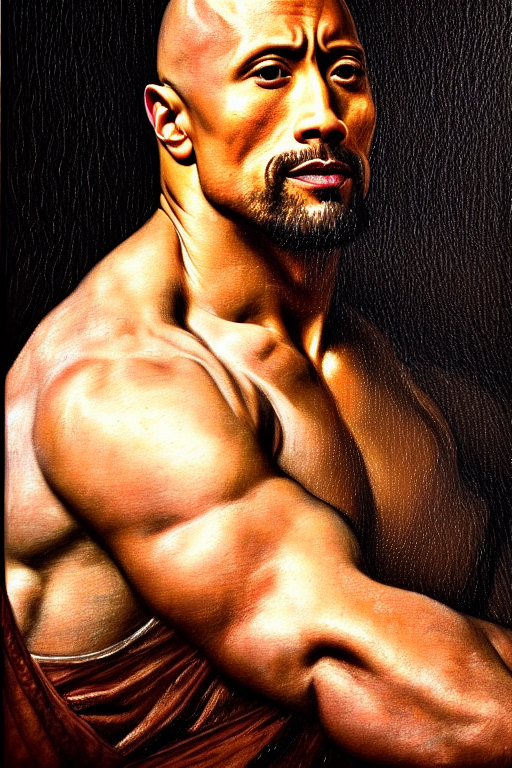

In [4]:
print(prompts_dataset[demo_index])
images_dataset[demo_index]

In [5]:
with open('WORDMAP_coco_5_cap_per_img_5_min_word_freq.json') as json_file:
    word_map_dict = json.load(json_file)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
                                     
demo_loader = DiffusionDBDataLoader(images_dataset[demo_index:demo_index+1], 
                                    prompts_dataset[demo_index:demo_index+1], 
                                    (max_img_width, max_img_height),
                                    word_map_dict, 
                                    transform=normalize)

torch.Size([3, 768, 512])


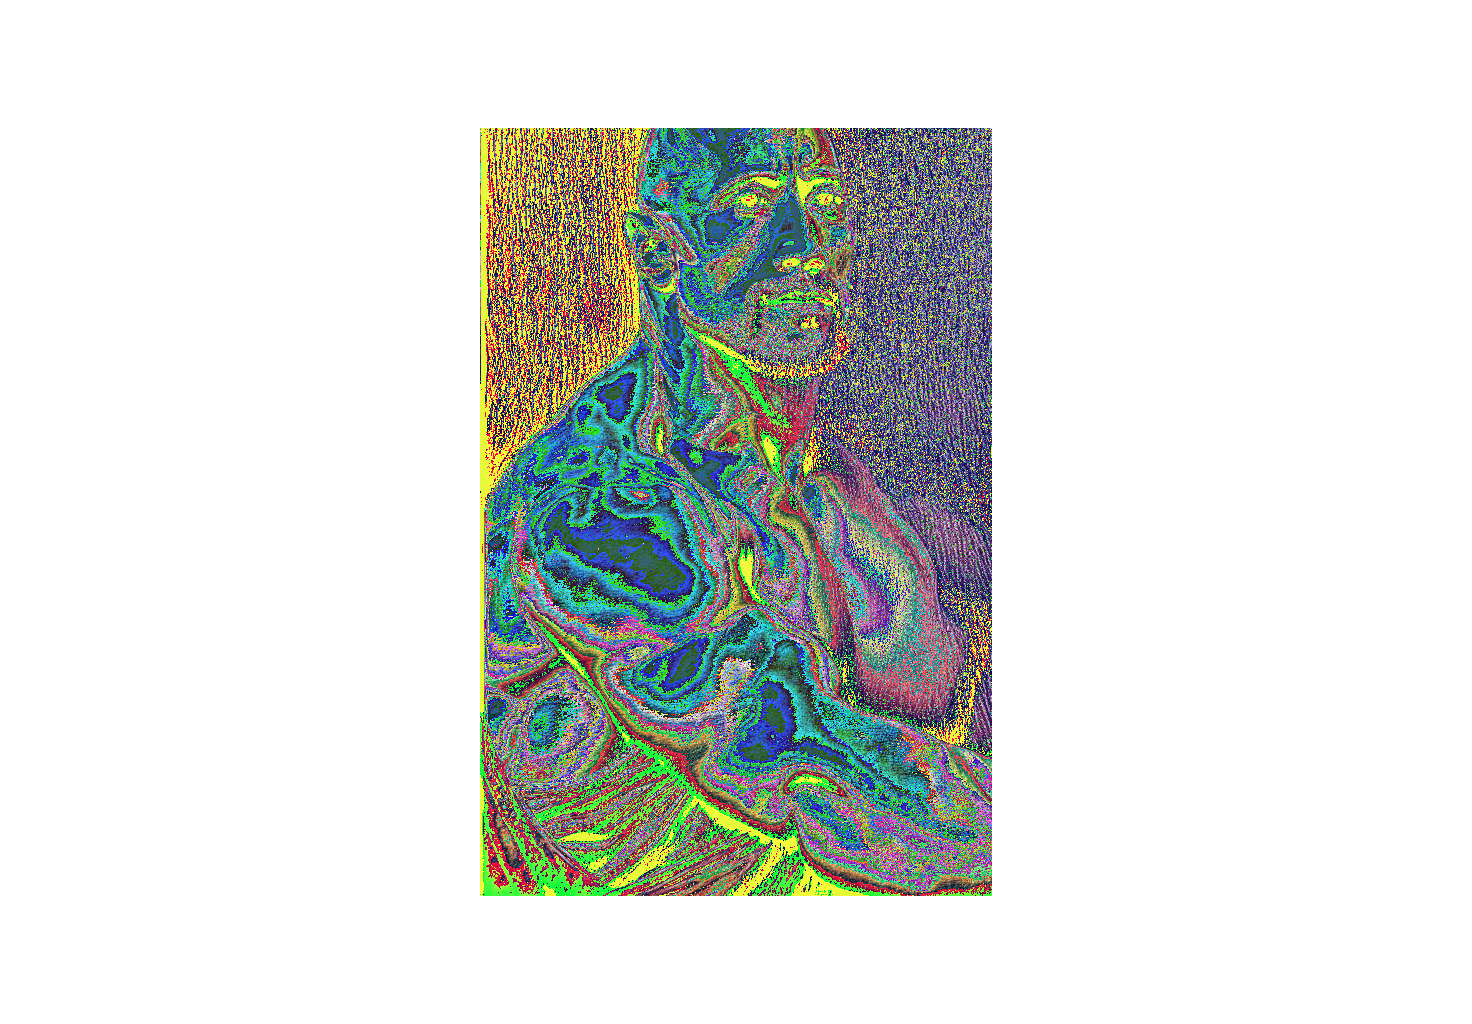

In [14]:
image_transformed, prompt_tokenized, prompt_tokenized_length = next(iter(demo_loader))
transform_tensor_to_img = transforms.ToPILImage()
transform_tensor_to_img(image_transformed)